<a href="https://colab.research.google.com/github/0bsidian03/CompPhysHW/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
a = 1.0
b = 1e8
c = 1.0
discriminant = np.sqrt(b**2 - 4*a*c)
xminus = (-b - discriminant) / (2*a)
print(f"(A) x- (standard formula): {xminus}")
xbad = (-b + discriminant) / (2*a)
print(f"(B) x+ (bad formula): {xbad}")
xgood = c / (a * xminus)
print(f"(C) x+ (good formula): {xgood}")

(A) x- (standard formula): -100000000.0
(B) x+ (bad formula): -7.450580596923828e-09
(C) x+ (good formula): -1e-08


the bad formula has a significant error assuming the good formula gives a true answer. This is likely due to the fact that because b is so large the numerator becomes close to 0 which can be messy especially at machine precision.+

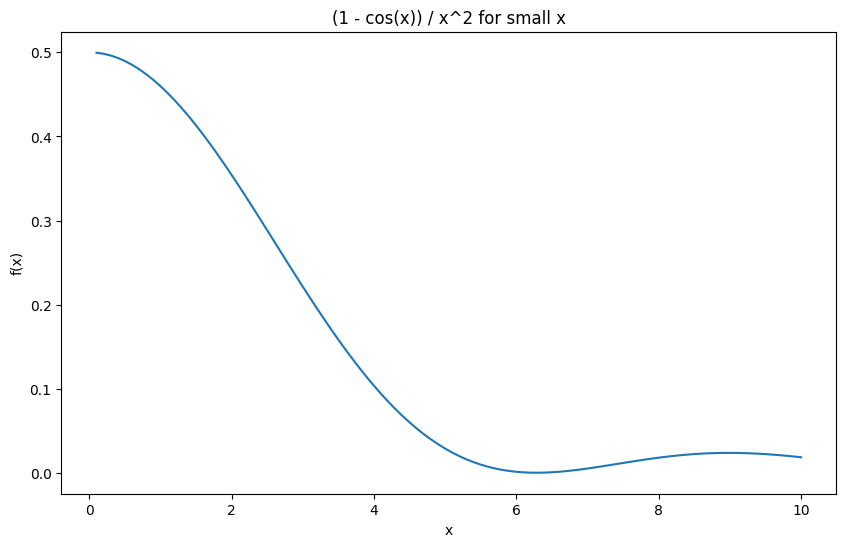

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(0.1, 10.0, 100)
def f(x):
    return (1 - np.cos(x)) / (x**2)
y = f(x)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.title('(1 - cos(x)) / x^2 for small x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


In [ ]:
xtiny = 1.2e-8
fxtiny = f(xtiny)
print(f"f({xtiny}) : {fxtiny}")

f(1.2e-08) : 0.7709882115452477


this is significantly higher than the limit of 0.5

In [ ]:
def f2(x):
    return (2 * np.sin(x/2)**2) / (x**2)
fxtiny2 = f2(xtiny)
print(f"f2({xtiny}) (): {fxtiny2}")

f2(1.2e-08) (): 0.5


much better

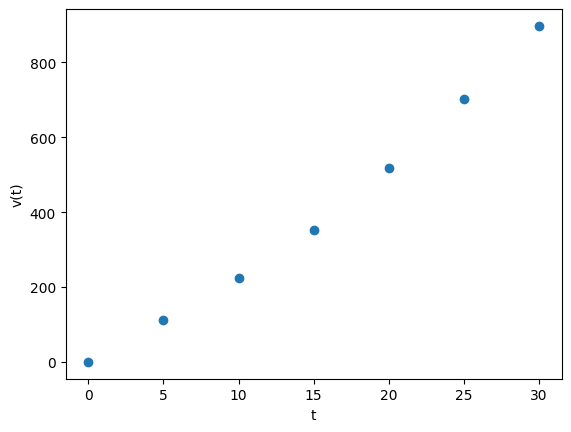

In [ ]:
t=[0,5,10,15,20,25,30]
vt=[0.0,111.8,225.1,351.9,519.2,702.6,897.7]
plt.scatter(t, vt)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.show()

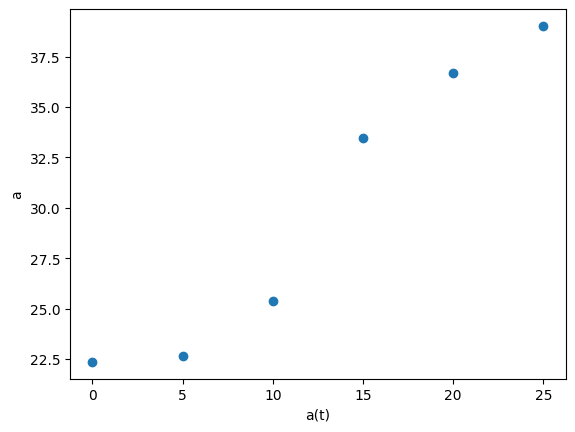

In [ ]:
a = []
ta = []
for i in range(len(t) - 1):
    atemp = (vt[i+1] - vt[i]) / (t[i+1] - t[i])
    a.append(atemp)
    ta.append(t[i])
plt.scatter(ta, a)
plt.xlabel('a(t)')
plt.ylabel('a')
plt.show()







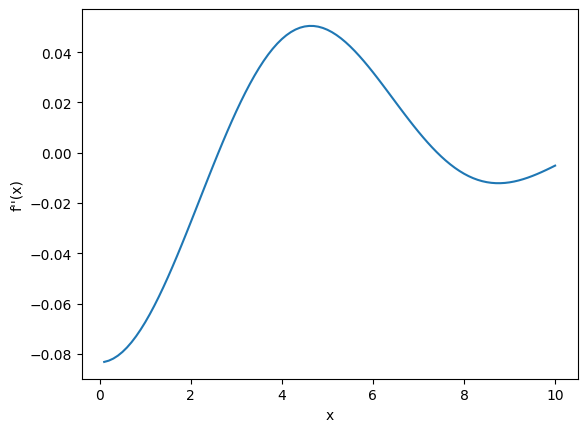

In [ ]:
a = []
ta = []
for i in range(len(t) - 1):
    atemp = (vt[i+1] - vt[i]) / (t[i+1] - t[i])
    a.append(atemp)
    ta.append(t[i])



def derivative2(f, x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
def fnew(x):
    return (2 * np.sin(x/2)**2) / (x**2)
xvals = np.linspace(0.1, 10.0, 100)
h = 0.001

derivatives = []
for xval in xvals:
    d2f = derivative2(fnew, xval, h)
    derivatives.append(d2f)
plt.plot(xvals, derivatives)
plt.xlabel('x')
plt.ylabel("f''(x)")
plt.show()






tried overlaying these they did not like that

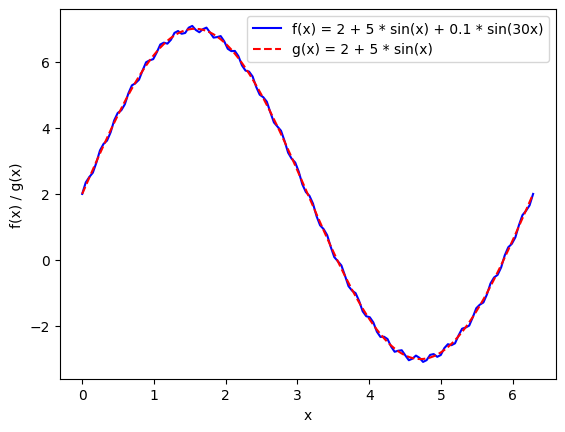

In [ ]:
def f(x):
    return 2 + 5 * np.sin(x) + 0.1 * np.sin(30 * x)
def g(x):
    return 2 + 5 * np.sin(x)
xvals = np.linspace(0, 2 * np.pi, 128)
fvals = f(xvals)
gvals = g(xvals)
plt.plot(xvals, fvals, label='f(x) = 2 + 5 * sin(x) + 0.1 * sin(30x)', color='blue')
plt.plot(xvals, gvals, label='g(x) = 2 + 5 * sin(x)', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x) / g(x)')
plt.legend()
plt.show()



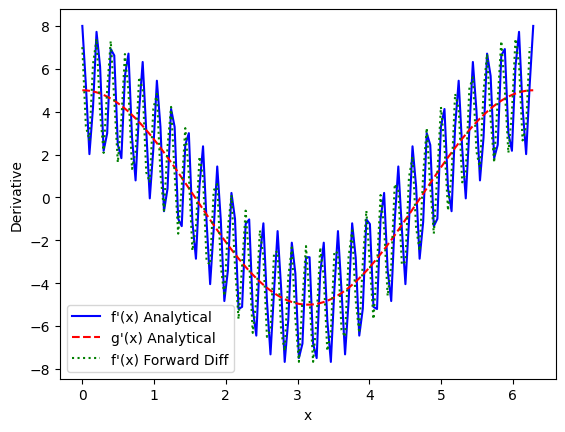

In [ ]:
def fanalytic(x):
    return 5 * np.cos(x) + 3 * np.cos(30 * x)
def ganalytic(x):
    return 5 * np.cos(x)
fanalyticvals = fanalytic(xvals)
ganalyticvals = ganalytic(xvals)
def fwrddiff(fvals, xvals):
    h = xvals[1] - xvals[0]
    ffrwrddiff = np.diff(fvals) / h
    return ffrwrddiff

ffrwrddiff = fwrddiff(fvals, xvals)

plt.plot(xvals, fanalyticvals, label="f'(x) Analytical", color='blue')
plt.plot(xvals, ganalyticvals, label="g'(x) Analytical", color='red', linestyle='--')
plt.plot(xvals[:-1], ffrwrddiff, label="f'(x) Forward Diff", color='green', linestyle=':')
plt.xlabel('x')
plt.ylabel("Derivative")
plt.legend()
plt.show()






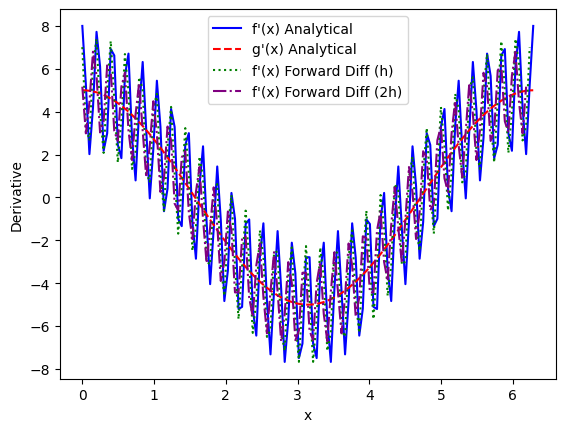

In [ ]:
def fanalytic(x):
    return 5 * np.cos(x) + 3 * np.cos(30 * x)
def ganalytic(x):
    return 5 * np.cos(x)
fanalyticvals = fanalytic(xvals)
ganalyticvals = ganalytic(xvals)
def fwrddiff(fvals, xvals):
    h = xvals[1] - xvals[0]
    ffrwrddiff = np.diff(fvals) / h
    return ffrwrddiff

def fwrddiff2(fvals, xvals):
    horiginal = xvals[1] - xvals[0]
    ffrwrddiff2 = (fvals[2:] - fvals[:-2]) / (2 * horiginal)
    return ffrwrddiff2

ffrwrddiff = fwrddiff(fvals, xvals)
ffrwrddiff2 = fwrddiff2(fvals, xvals)

plt.plot(xvals, fanalyticvals, label="f'(x) Analytical", color='blue')
plt.plot(xvals, ganalyticvals, label="g'(x) Analytical", color='red', linestyle='--')
plt.plot(xvals[:-1], ffrwrddiff, label="f'(x) Forward Diff (h)", color='green', linestyle=':')
plt.plot(xvals[:-2], ffrwrddiff2, label="f'(x) Forward Diff (2h)", color='purple', linestyle='-.')
plt.xlabel('x')
plt.ylabel("Derivative")
plt.legend()
plt.show()